In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
boston = pd.read_csv("HousingData.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
boston.info()
boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


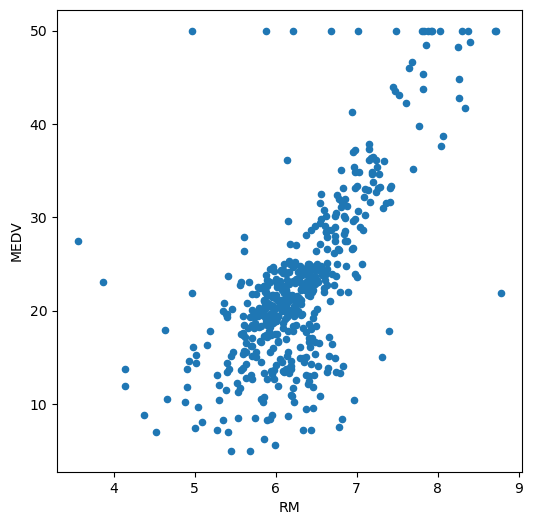

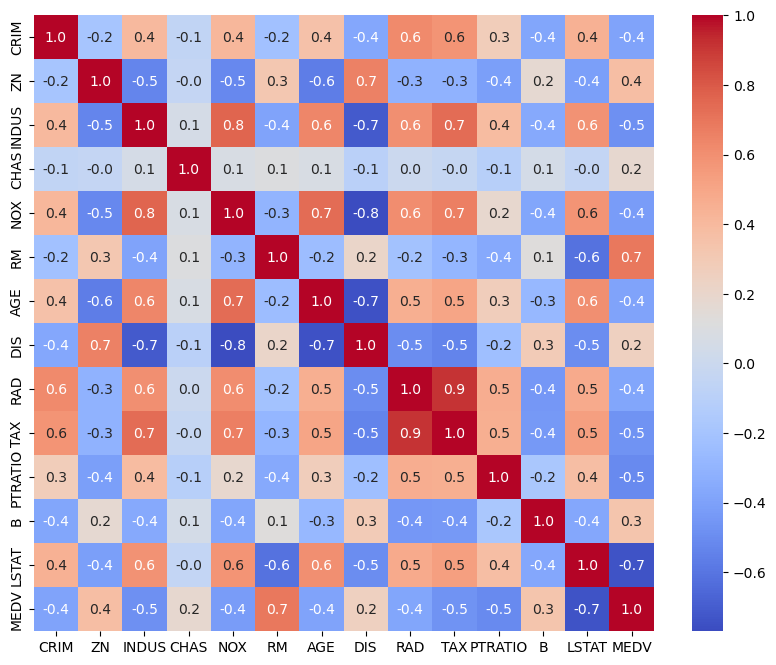

In [4]:
boston.plot.scatter('RM','MEDV',figsize=(6,6))
plt.subplots(figsize=(10,8))
sns.heatmap(boston.corr(), cmap = 'coolwarm', annot = True, fmt = '.1f');

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [6]:
X = boston[boston.columns[:-1]]
Y = boston['MEDV']


In [7]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.3)

In [9]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)


In [10]:
lm = LinearRegression()
lm.fit(X_train_scaled, Y_train)

LinearRegression()

In [11]:
predictions = lm.predict(X_test_scaled)

<Figure size 600x600 with 0 Axes>

Text(0.5, 0, 'Y Test')

Text(0, 0.5, 'Predicted Y')

Text(0.5, 1.0, 'Test vs Prediction')

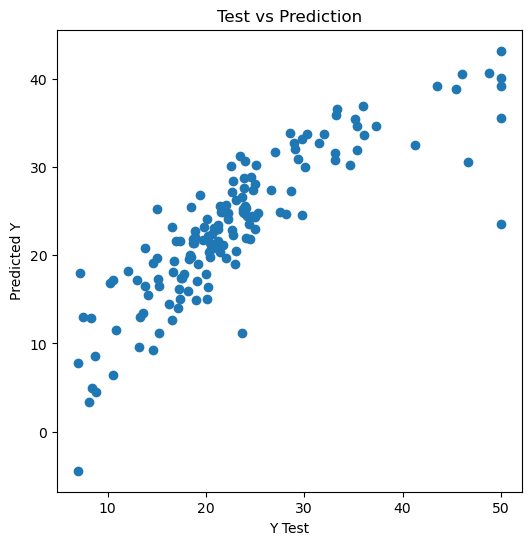

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Target')

Text(0.5, 1.0, 'Regression Line Tracing')

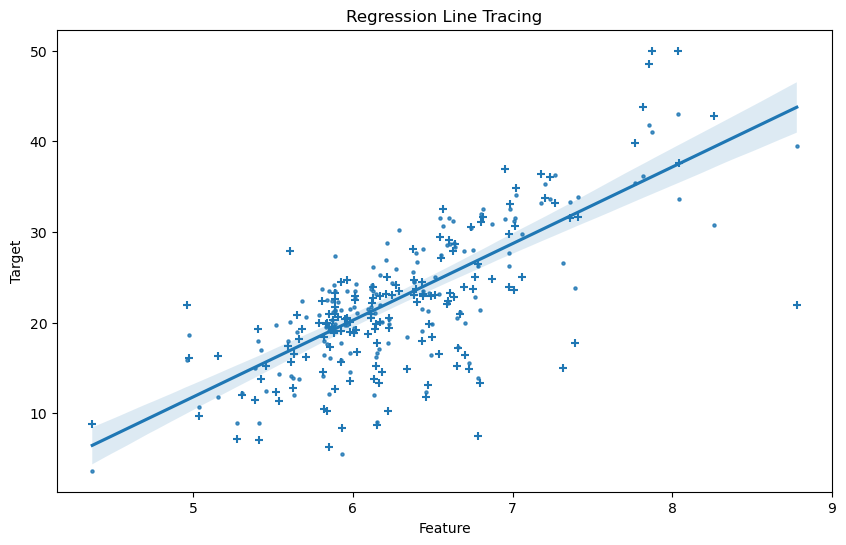

In [12]:
feature_index = 5  # Adjust this index based on which feature you want to plot against predictions
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test[:, feature_index], y=predictions, scatter_kws={'s': 5})
plt.scatter(X_test[:, feature_index], Y_test, marker='+')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression Line Tracing')
plt.show()

In [13]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
coefficients = pd.DataFrame(lm.coef_.round(2), X.columns)
coefficients.columns = ['Coefficients']
coefficients

Mean Absolute Error: 3.1364399511359053
Mean Square Error: 17.310567412710473
Root Mean Square Error: 4.16059700195903


,Coefficients
CRIM,-1.20
ZN,0.76
INDUS,-0.20
CHAS,0.89
NOX,-2.21
RM,2.93
AGE,-0.16
DIS,-3.25
RAD,2.60
TAX,-1.48
